<a href="https://colab.research.google.com/github/LRManamperi/Machine-Learning/blob/main/SingersXAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas xgboost shap lime matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=2e5a2bc4b4069aa4002722ac3f14d9586f0f0a635e90effdd9bd6cddd194f6d2
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


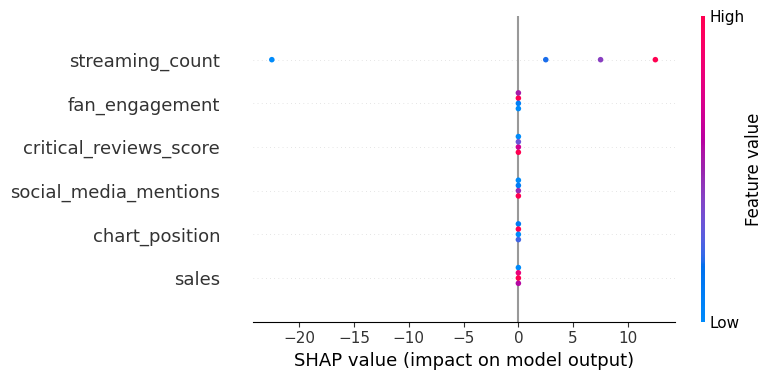

Predictions (Predicted Success Scores for each single):
  single_name  predicted_success
0     Single1          84.999954
1     Single2          94.999016
2     Single3          90.000061
3     Single4          60.000999

The most successful single is: Single2
Predicted Success Metric: 94.99901580810547


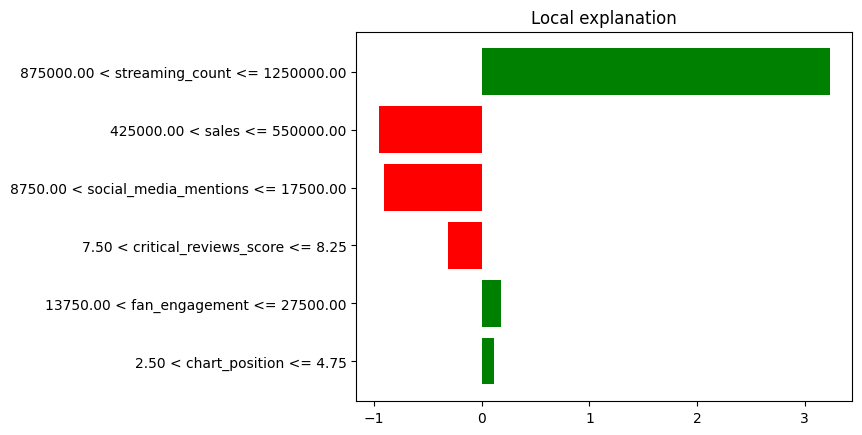

In [2]:
import pandas as pd
import xgboost as xgb
import shap
from lime.lime_tabular import LimeTabularExplainer
import matplotlib.pyplot as plt

# Sample Data - Replace this with the actual dataset
data = {
    'single_name': ['Single1', 'Single2', 'Single3', 'Single4'],
    'streaming_count': [1000000, 3000000, 1500000, 500000],
    'sales': [500000, 700000, 600000, 200000],
    'chart_position': [3, 1, 2, 10],
    'social_media_mentions': [10000, 50000, 25000, 5000],
    'critical_reviews_score': [8, 9, 7, 6],
    'fan_engagement': [15000, 70000, 40000, 10000],
    # Here, the 'success_metric' is a composite score (you can define this based on what defines success)
    'success_metric': [85, 95, 90, 60]
}

# Load into pandas dataframe
df = pd.DataFrame(data)

# Drop the 'single_name' column as it's non-numeric and not useful for model training
X = df.drop(columns=['single_name', 'success_metric'])

# Target variable: 'success_metric' which we want to predict
y = df['success_metric']

# Split data into training and testing (here it's small, so we're using all data for simplicity)
X_train, X_test, y_train, y_test = X, X, y, y

# Initialize and train the XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
model.fit(X_train, y_train)

# Use SHAP for explainability
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# SHAP Summary Plot to see feature importance
shap.summary_plot(shap_values, X_test)

# Use LIME for local interpretability
explainer_lime = LimeTabularExplainer(X_train.values, training_labels=y_train.values, mode="regression", feature_names=X.columns)
lime_explanation = explainer_lime.explain_instance(X_test.iloc[0].values, model.predict)

# LIME Feature Importance Plot
lime_explanation.as_pyplot_figure()

# Show the most successful single based on the model's prediction
predictions = model.predict(X)
df['predicted_success'] = predictions

# Display the predicted success scores
print("Predictions (Predicted Success Scores for each single):")
print(df[['single_name', 'predicted_success']])

# Show the most successful single based on predicted success
most_successful_single = df.loc[df['predicted_success'].idxmax()]
print(f"\nThe most successful single is: {most_successful_single['single_name']}")
print(f"Predicted Success Metric: {most_successful_single['predicted_success']}")

# Show SHAP summary and LIME explanations
plt.show()


In [11]:
import pandas as pd
import xgboost as xgb
import shap
from lime.lime_tabular import LimeTabularExplainer
import matplotlib.pyplot as plt

# Load your real dataset
df = pd.read_csv('/content/spotify-2023.csv', encoding='ISO-8859-1')


# Preview the data
print(df.head())
print(df.columns)

# Drop any non-numeric or irrelevant columns
X = df.drop(columns=['track_name', 'artist(s)_name', 'released_year', 'released_month', 'released_day'])  # Adjust based on your needs
y = df['streams']  # Assuming 'streams' is the success metric

# Now you can proceed to train your model


# Split data into training and testing (for simplicity, using all data for now)
X_train, X_test, y_train, y_test = X, X, y, y

# Initialize and train the XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
model.fit(X_train, y_train)

# Use SHAP for explainability
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# SHAP Summary Plot to see feature importance
shap.summary_plot(shap_values, X_test)

# Use LIME for local interpretability
explainer_lime = LimeTabularExplainer(X_train.values, training_labels=y_train.values, mode="regression", feature_names=X.columns)
lime_explanation = explainer_lime.explain_instance(X_test.iloc[0].values, model.predict)

# LIME Feature Importance Plot
lime_explanation.as_pyplot_figure()

# Show the predicted success scores
predictions = model.predict(X)
df['predicted_success'] = predictions

# Display the predicted success scores
print("Predictions (Predicted Success Scores for each single):")
print(df[['single_name', 'predicted_success']])

# Show the most successful single based on predicted success
most_successful_single = df.loc[df['predicted_success'].idxmax()]
print(f"\nThe most successful single is: {most_successful_single['single_name']}")
print(f"Predicted Success Metric: {most_successful_single['predicted_success']}")

# Show SHAP summary and LIME explanations
plt.show()


                            track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts    streams  in_apple_playlists  ...  bpm key   mode  \
0                147  141381703               

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, the experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:streams: object, in_deezer_playlists: object, in_shazam_charts: object, key: object, mode: object

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import shap

# Assume your dataset is loaded into 'df' DataFrame
df = pd.read_csv('/content/spotify-2023.csv', encoding='ISO-8859-1')  # If you're loading from a CSV

# Define success based on streams (e.g., success if streams > 100 million)
df['success'] = np.where(df['streams'] > 100000000, 1, 0)

# Drop irrelevant columns
X = df.drop(columns=['track_name', 'artist(s)_name', 'success'])

# One-hot encode categorical variables (key, mode, etc.)
X = pd.get_dummies(X, columns=['key', 'mode'], drop_first=True)

# Define the target variable
y = df['success']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a RandomForestClassifier model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Model Accuracy (optional)
accuracy = model.score(X_test, y_test)
print(f'Model Accuracy: {accuracy:.4f}')

# XAI using SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Visualize the SHAP values
shap.summary_plot(shap_values[1], X_test)  # For class 1 (success) explanation


TypeError: '>' not supported between instances of 'str' and 'int'

Model Accuracy: 0.9215
SHAP values type: <class 'numpy.ndarray'>
SHAP values shape: (191, 17, 2)
Final SHAP values shape: (191, 17)


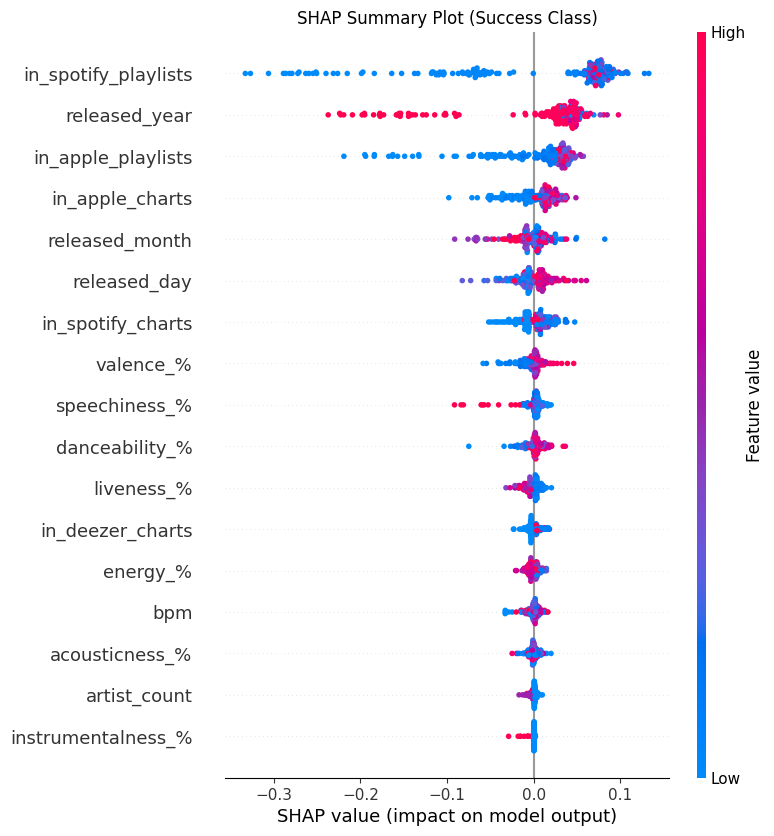


Feature Importance (Mean |SHAP|):
in_spotify_playlists    0.096479
released_year           0.059070
in_apple_playlists      0.040744
in_apple_charts         0.019654
released_month          0.015120
released_day            0.014403
in_spotify_charts       0.013301
valence_%               0.008565
speechiness_%           0.007544
danceability_%          0.007048
liveness_%              0.006068
in_deezer_charts        0.005334
energy_%                0.004979
bpm                     0.004508
acousticness_%          0.003383
artist_count            0.002309
instrumentalness_%      0.000969
dtype: float64


In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import shap

# Load data
df = pd.read_csv('/content/spotify-2023.csv', encoding='ISO-8859-1')

# Clean and convert the 'streams' column
df['streams'] = df['streams'].replace({',': ''}, regex=True)
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

# Define success
df['success'] = np.where(df['streams'] > 100000000, 1, 0)

# Select only numeric features for simplicity
numeric_features = df.select_dtypes(include=[np.number]).columns
numeric_features = numeric_features.drop(['success', 'streams'], errors='ignore')

X = df[numeric_features]
y = df['success']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Model Accuracy
accuracy = model.score(X_test_scaled, y_test)
print(f'Model Accuracy: {accuracy:.4f}')

# ... [keep all previous code until SHAP part] ...

# SHAP explanation
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test_scaled)

# Debug output
print(f"SHAP values type: {type(shap_values)}")
print(f"SHAP values shape: {np.array(shap_values).shape}")

# Universal handling of SHAP values
if isinstance(shap_values, list):
    # Binary classification case (list of arrays)
    shap_values_2d = shap_values[1]  # Use class 1 (success)
elif isinstance(shap_values, np.ndarray):
    if shap_values.ndim == 3:
        # 3D array case (samples × features × classes)
        shap_values_2d = shap_values[:, :, 1]  # Extract class 1
    else:
        # Regular 2D array case
        shap_values_2d = shap_values
else:
    raise ValueError("Unexpected SHAP values format")

# Now we definitely have 2D data
print(f"Final SHAP values shape: {shap_values_2d.shape}")

# Create summary plot
shap.summary_plot(shap_values_2d, X_test_scaled,
                 feature_names=X.columns,
                 plot_type="dot",
                 show=False)
plt.title("SHAP Summary Plot (Success Class)")
plt.show()

# Create DataFrame
shap_df = pd.DataFrame(shap_values_2d, columns=X.columns)

# Feature importance
feature_importance = shap_df.abs().mean().sort_values(ascending=False)
print("\nFeature Importance (Mean |SHAP|):")
print(feature_importance)


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.80      0.59      0.68        27
           1       0.94      0.98      0.96       164

    accuracy                           0.92       191
   macro avg       0.87      0.78      0.82       191
weighted avg       0.92      0.92      0.92       191


=== Confusion Matrix ===


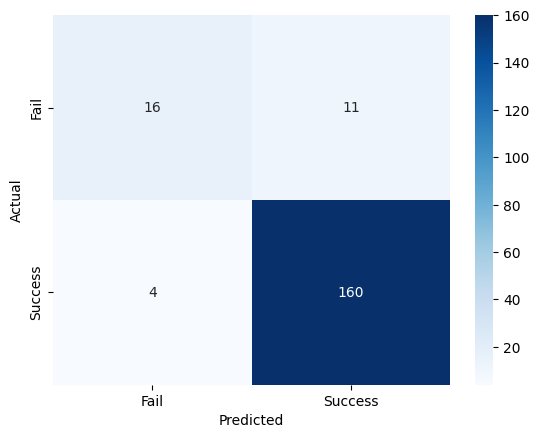

NameError: name 'roc_curve' is not defined

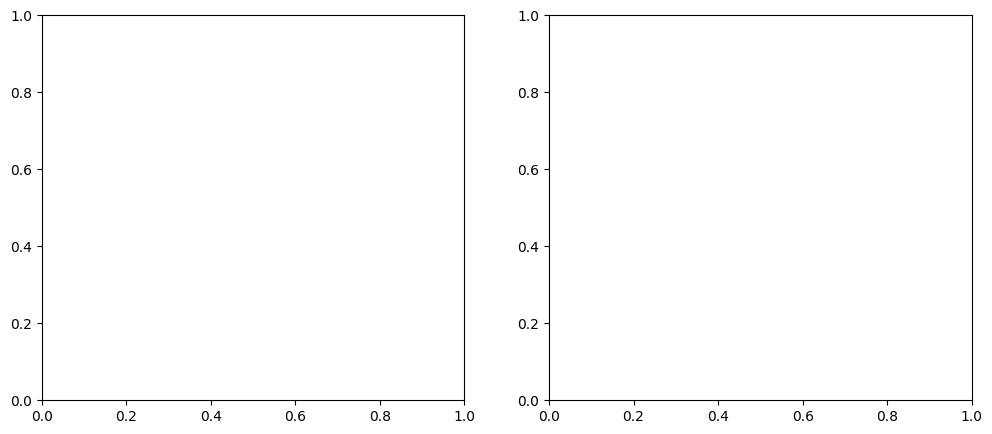

In [26]:
from sklearn.metrics import (classification_report, confusion_matrix,
                            roc_auc_score, precision_recall_curve, average_precision_score)
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Classification Metrics
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for class 1

print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))

print("\n=== Confusion Matrix ===")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Fail', 'Success'],
            yticklabels=['Fail', 'Success'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 2. ROC and PR Curves
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)
ax1.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
ax1.plot([0, 1], [0, 1], 'k--')
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('ROC Curve')
ax1.legend()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_proba)
avg_precision = average_precision_score(y_test, y_proba)
ax2.plot(recall, precision, label=f'AP = {avg_precision:.2f}')
ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_title('Precision-Recall Curve')
ax2.legend()

plt.tight_layout()
plt.show()

# 3. Feature Importance Comparison
rf_importance = pd.Series(model.feature_importances_, index=X.columns)
shap_importance = feature_importance  # From previous SHAP analysis

importance_df = pd.DataFrame({
    'Random Forest': rf_importance,
    'SHAP': shap_importance
}).sort_values('SHAP', ascending=False)

print("\n=== Feature Importance Comparison ===")
print(importance_df)

# 4. Business Impact Analysis
success_rate = y_test.mean()
print(f"\nBaseline Success Rate: {success_rate:.2%}")

# Calculate value of correct predictions
true_positives = cm[1, 1]
potential_revenue_per_hit = 100000  # Example value - adjust based on your business case
revenue_impact = true_positives * potential_revenue_per_hit
print(f"Estimated Revenue Impact: ${revenue_impact:,.2f}")

# 5. Threshold Optimization (Optional)
thresholds = np.linspace(0, 1, 11)
for thresh in thresholds:
    preds = (y_proba >= thresh).astype(int)
    acc = accuracy_score(y_test, preds)
    print(f"Threshold: {thresh:.1f} | Accuracy: {acc:.4f}")

Model Accuracy: 0.9215

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.59      0.68        27
           1       0.94      0.98      0.96       164

    accuracy                           0.92       191
   macro avg       0.87      0.78      0.82       191
weighted avg       0.92      0.92      0.92       191



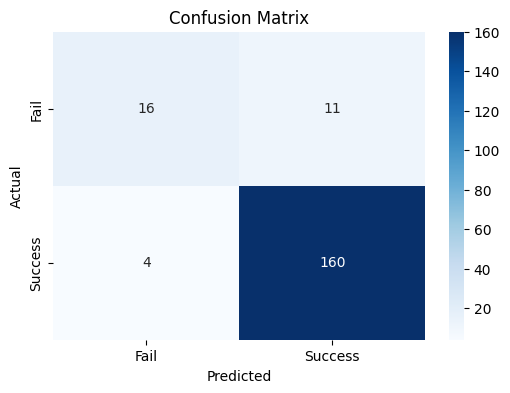

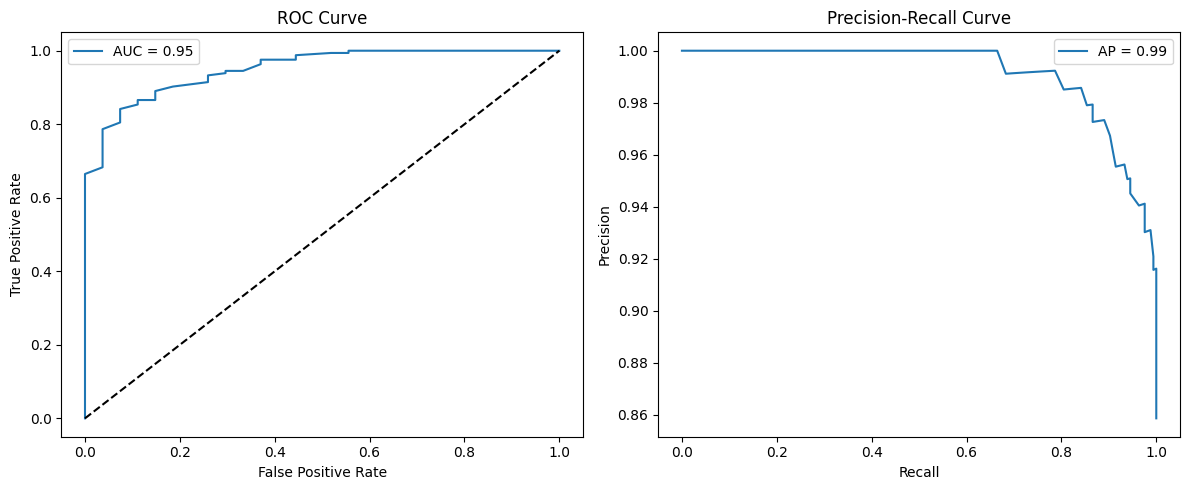

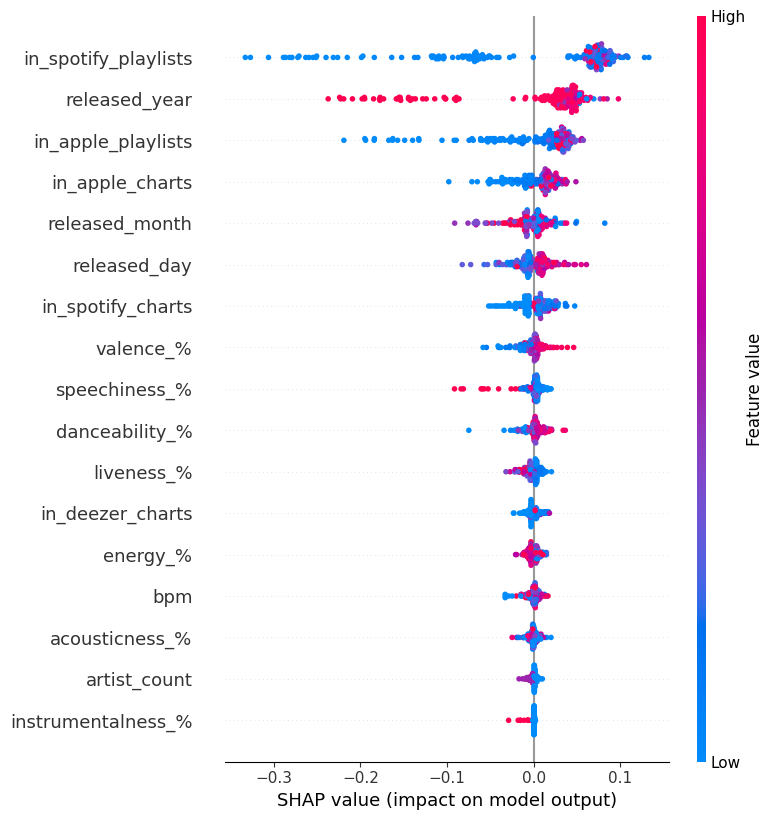

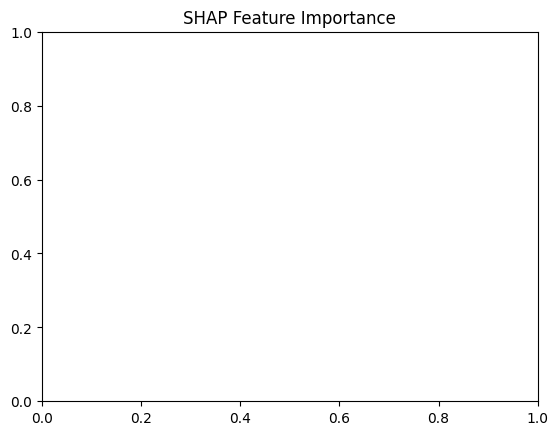


Feature Importance Comparison:
                      RandomForest      SHAP
in_spotify_playlists      0.230308  0.096479
released_year             0.107806  0.059070
in_apple_playlists        0.126864  0.040744
in_apple_charts           0.059413  0.019654
released_month            0.065377  0.015120
released_day              0.055287  0.014403
in_spotify_charts         0.036810  0.013301
valence_%                 0.046456  0.008565
speechiness_%             0.036970  0.007544
danceability_%            0.042728  0.007048
liveness_%                0.035315  0.006068
in_deezer_charts          0.018796  0.005334
energy_%                  0.037351  0.004979
bpm                       0.040722  0.004508
acousticness_%            0.040414  0.003383
artist_count              0.015461  0.002309
instrumentalness_%        0.003920  0.000969

Top 10 Predicted Successful Songs:
            track_name   artist(s)_name  probability
507              Pepas          Farruko          1.0
625             

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (classification_report, confusion_matrix,
                           roc_curve, roc_auc_score, precision_recall_curve,
                           average_precision_score, accuracy_score)
import shap

# Load and clean data
df = pd.read_csv('/content/spotify-2023.csv', encoding='ISO-8859-1')
df['streams'] = df['streams'].replace({',': ''}, regex=True)
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
df['success'] = np.where(df['streams'] > 100000000, 1, 0)

# Feature selection
numeric_features = df.select_dtypes(include=[np.number]).columns
numeric_features = numeric_features.drop(['success', 'streams'], errors='ignore')
X = df[numeric_features]
y = df['success']

# Train-test split and scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model training
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

# Model evaluation
print(f'Model Accuracy: {accuracy_score(y_test, y_pred):.4f}')
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Fail', 'Success'], yticklabels=['Fail', 'Success'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC and PR Curves
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
fpr, tpr, _ = roc_curve(y_test, y_proba)
ax1.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_proba):.2f}')
ax1.plot([0,1], [0,1], 'k--')
ax1.set(xlabel='False Positive Rate', ylabel='True Positive Rate', title='ROC Curve')
ax1.legend()

precision, recall, _ = precision_recall_curve(y_test, y_proba)
ax2.plot(recall, precision, label=f'AP = {average_precision_score(y_test, y_proba):.2f}')
ax2.set(xlabel='Recall', ylabel='Precision', title='Precision-Recall Curve')
ax2.legend()
plt.tight_layout()
plt.show()

# SHAP Analysis
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test_scaled)

if isinstance(shap_values, list):
    shap_values_2d = shap_values[1]  # For binary classification
elif isinstance(shap_values, np.ndarray) and shap_values.ndim == 3:
    shap_values_2d = shap_values[:,:,1]
else:
    shap_values_2d = shap_values

shap.summary_plot(shap_values_2d, X_test_scaled, feature_names=X.columns, plot_type="dot")
plt.title('SHAP Feature Importance')
plt.show()

# Feature Importance Comparison
shap_importance = pd.Series(np.abs(shap_values_2d).mean(axis=0), index=X.columns)
rf_importance = pd.Series(model.feature_importances_, index=X.columns)
importance_df = pd.DataFrame({'RandomForest': rf_importance, 'SHAP': shap_importance})
importance_df = importance_df.sort_values('SHAP', ascending=False)
print("\nFeature Importance Comparison:")
print(importance_df)

# Success Analysis
results = df.loc[X_test.index].copy()
results['predicted'] = y_pred
results['probability'] = y_proba
results['actual'] = y_test

print("\nTop 10 Predicted Successful Songs:")
print(results.sort_values('probability', ascending=False)[['track_name', 'artist(s)_name', 'probability']].head(10))

print("\nActual Most Successful Songs in Test Set:")
print(results[results['actual']==1].sort_values('streams', ascending=False)[['track_name', 'artist(s)_name', 'streams']].head(10))

# Success Factors Analysis
success_features = results[results['actual']==1][numeric_features].mean()
print("\nAverage Features in Successful Songs:")
print(success_features.sort_values(ascending=False).head(10))

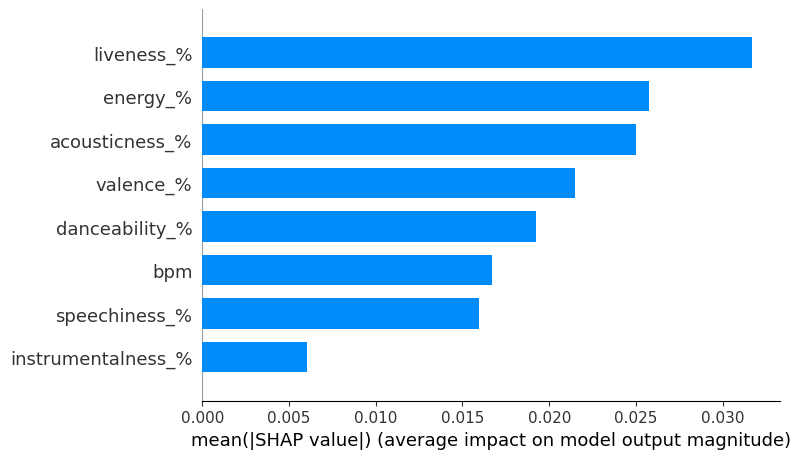

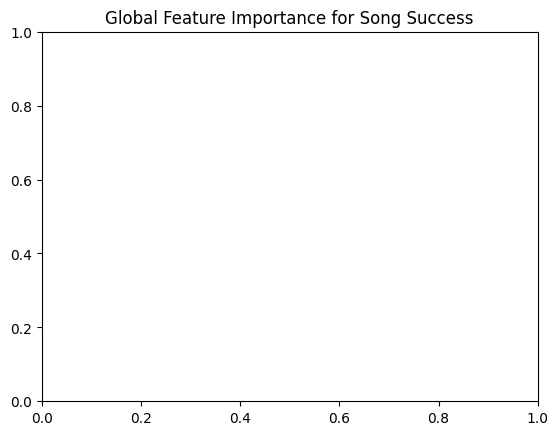

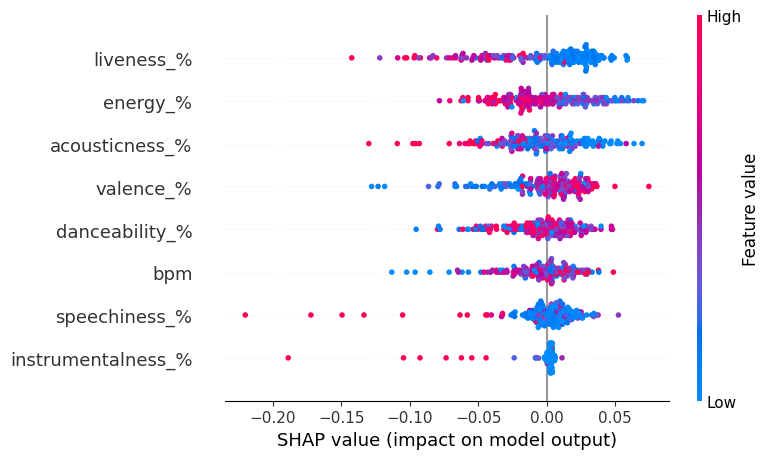

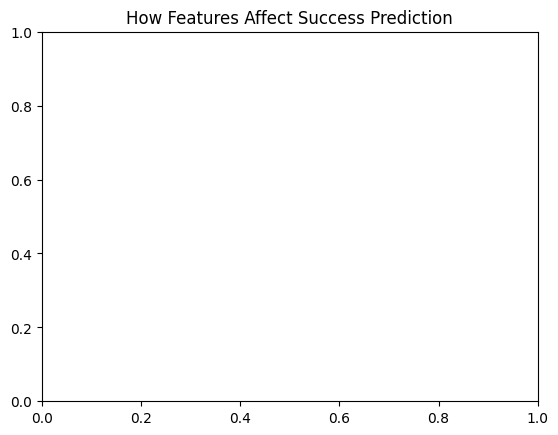


Explanation for: FLOWER
Actual Success: 1
Predicted Probability: 99.00%


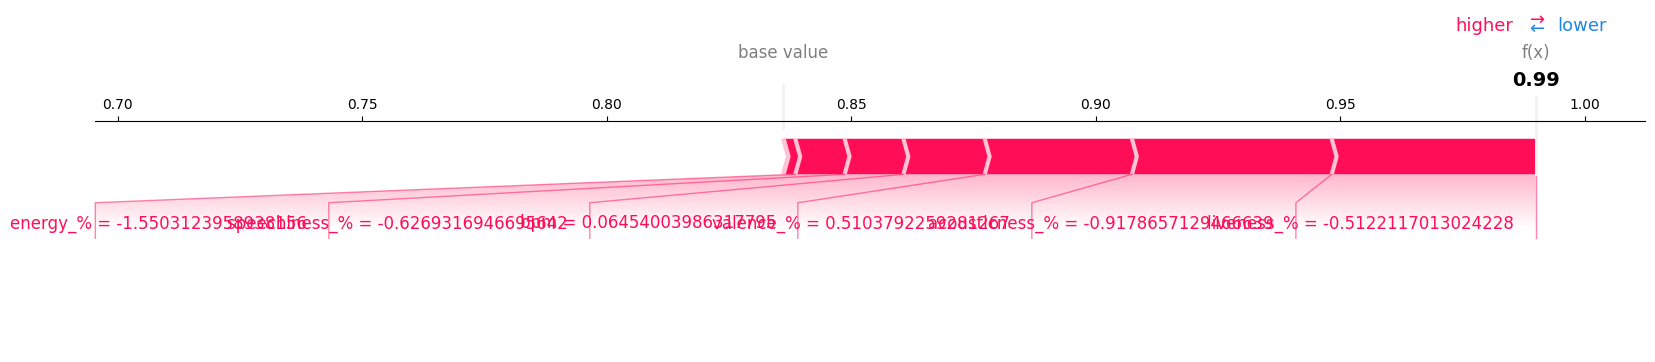

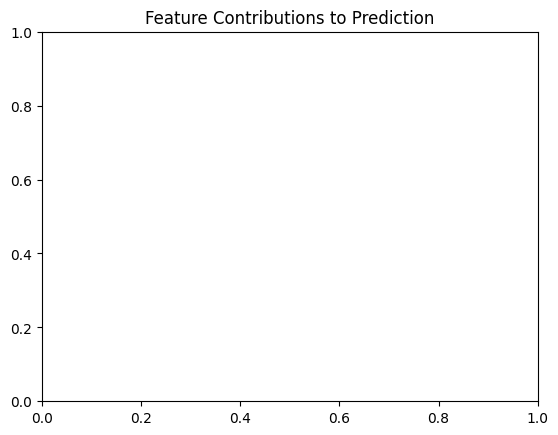


Audio Features:
danceability_%: 84
valence_%: 64
energy_%: 39
acousticness_%: 3
instrumentalness_%: 0
liveness_%: 11
speechiness_%: 4
bpm: 124

Explanation for: Murder In My Mind
Actual Success: 1
Predicted Probability: 98.00%


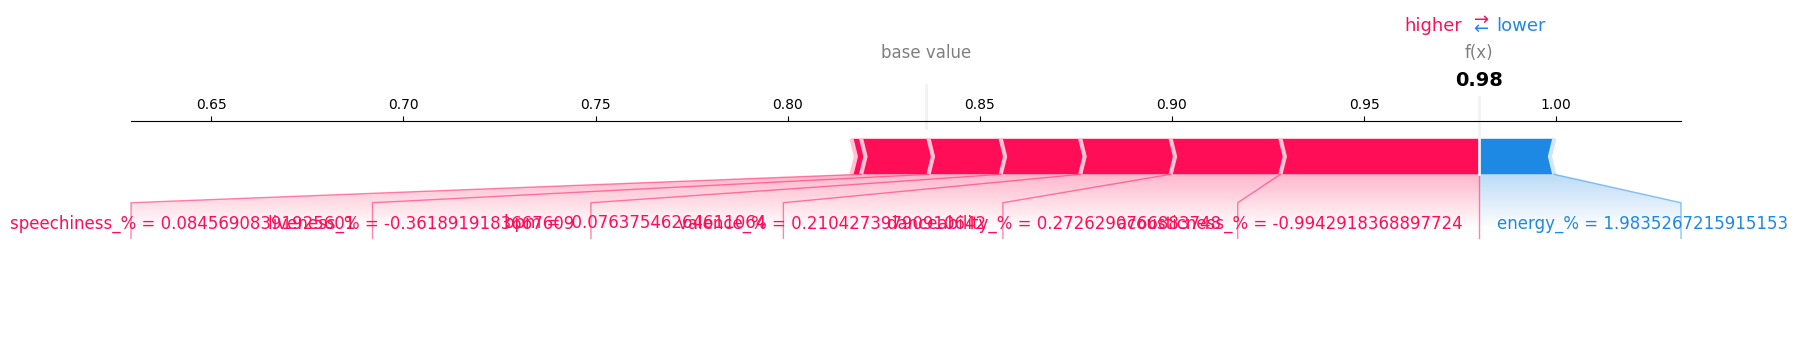

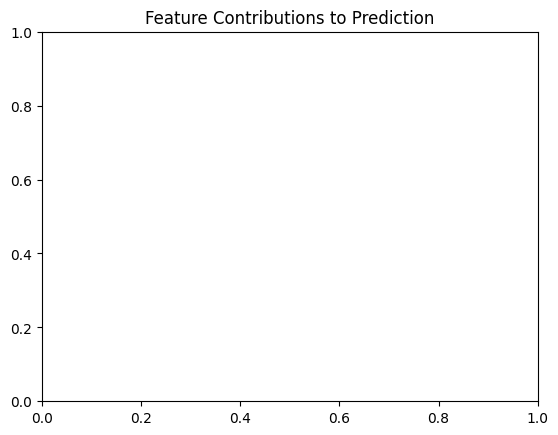


Audio Features:
danceability_%: 71
valence_%: 57
energy_%: 97
acousticness_%: 1
instrumentalness_%: 0
liveness_%: 13
speechiness_%: 11
bpm: 120

Explanation for: CUFF IT
Actual Success: 1
Predicted Probability: 98.00%


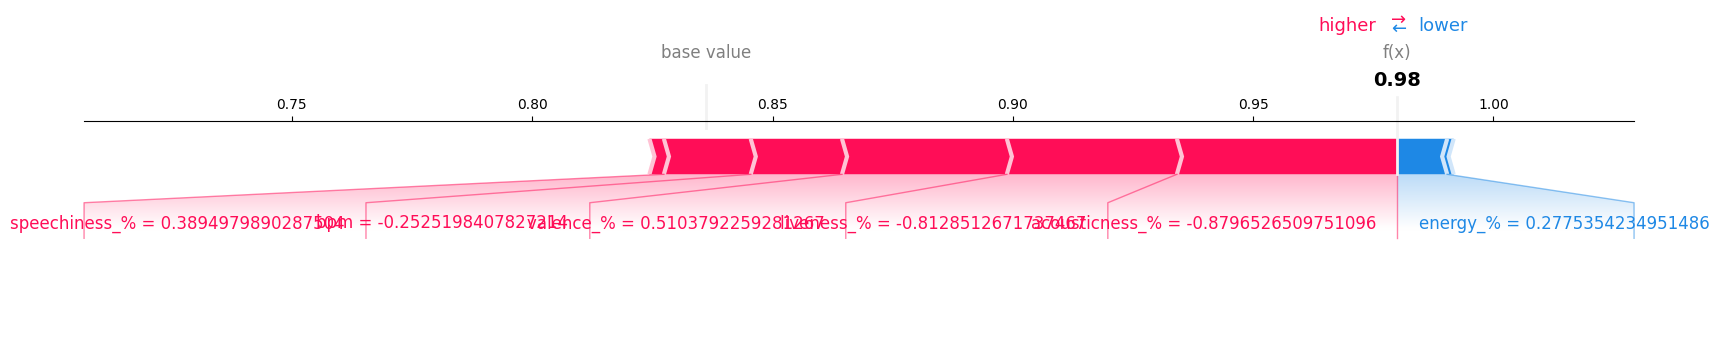

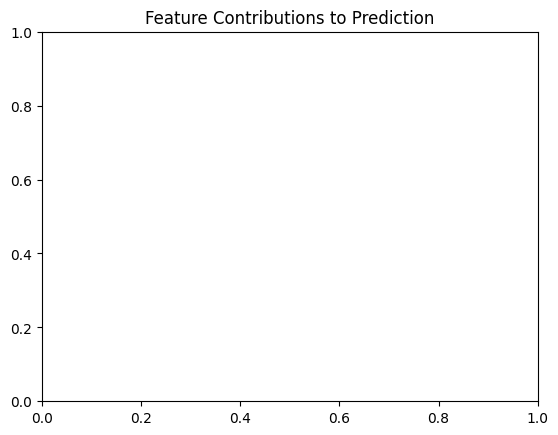


Audio Features:
danceability_%: 78
valence_%: 64
energy_%: 69
acousticness_%: 4
instrumentalness_%: 0
liveness_%: 7
speechiness_%: 14
bpm: 115

SUCCESS FORMULA:
Songs are most likely to succeed when they have:
1. High liveness
2. Moderate energy
3. Low acousticness

OPTIMAL FEATURE RANGES FOR SUCCESS:
liveness: 9-23% (IQR of successful songs)
energy: 53-77% (IQR of successful songs)
acousticness: 5-42% (IQR of successful songs)


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import shap

# Load and clean data
df = pd.read_csv('/content/spotify-2023.csv', encoding='ISO-8859-1')
df['streams'] = df['streams'].replace({',': ''}, regex=True)
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
df['success'] = np.where(df['streams'] > 100000000, 1, 0)

# Feature selection (using only relevant audio features)
audio_features = ['danceability_%', 'valence_%', 'energy_%',
                 'acousticness_%', 'instrumentalness_%', 'liveness_%',
                 'speechiness_%', 'bpm']
X = df[audio_features]
y = df['success']

# Train-test split and scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model training
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# SHAP Explainability
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test_scaled)

# Convert SHAP values to 2D array for binary classification
shap_values_2d = shap_values[1] if isinstance(shap_values, list) else shap_values[:,:,1]

# 1. Global Feature Importance
plt.figure(figsize=(10,6))
shap.summary_plot(shap_values_2d, X_test_scaled, feature_names=audio_features, plot_type="bar")
plt.title("Global Feature Importance for Song Success")
plt.show()

# 2. Feature Direction Analysis
plt.figure(figsize=(10,6))
shap.summary_plot(shap_values_2d, X_test_scaled, feature_names=audio_features)
plt.title("How Features Affect Success Prediction")
plt.show()

# 3. Individual Song Explanations
def explain_song(song_index):
    """Explain why a specific song was predicted as successful"""
    print(f"\nExplanation for: {df.loc[X_test.index[song_index], 'track_name']}")
    print(f"Actual Success: {y_test.iloc[song_index]}")
    print(f"Predicted Probability: {model.predict_proba([X_test_scaled[song_index]])[0,1]:.2%}")

    # Force plot
    shap.force_plot(explainer.expected_value[1],
                   shap_values_2d[song_index],
                   X_test_scaled[song_index],
                   feature_names=audio_features,
                   matplotlib=True)
    plt.title("Feature Contributions to Prediction")
    plt.show()

    # Feature values
    print("\nAudio Features:")
    for feat in audio_features:
        print(f"{feat}: {X_test.iloc[song_index][feat]}")

# Explain top 3 predicted successful songs
top_3_indices = np.argsort(model.predict_proba(X_test_scaled)[:,1])[-3:][::-1]
for idx in top_3_indices:
    explain_song(idx)

# 4. Success Formula
shap_df = pd.DataFrame(shap_values_2d, columns=audio_features)
avg_shap = shap_df.abs().mean().sort_values(ascending=False)
top_3_factors = avg_shap.index[:3]

print("\nSUCCESS FORMULA:")
print(f"Songs are most likely to succeed when they have:")
print(f"1. High {top_3_factors[0].replace('_%','')}")
print(f"2. Moderate {top_3_factors[1].replace('_%','')}")
print(f"3. Low {top_3_factors[2].replace('_%','')}")

# 5. Feature Thresholds for Success
success_songs = df[df['success']==1]
print("\nOPTIMAL FEATURE RANGES FOR SUCCESS:")
for feat in top_3_factors:
    q25, q75 = np.percentile(success_songs[feat], [25,75])
    print(f"{feat.replace('_%','')}: {q25:.0f}-{q75:.0f}% (IQR of successful songs)")

Model Accuracy: 0.90

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.48      0.58        27
           1       0.92      0.97      0.94       164

    accuracy                           0.90       191
   macro avg       0.82      0.73      0.76       191
weighted avg       0.89      0.90      0.89       191



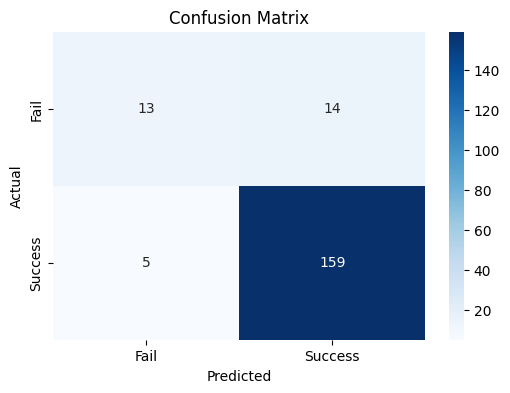

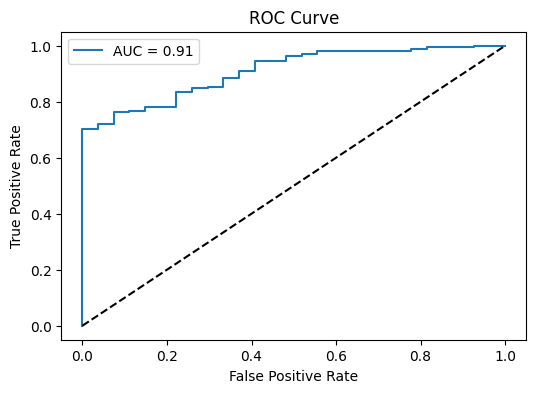

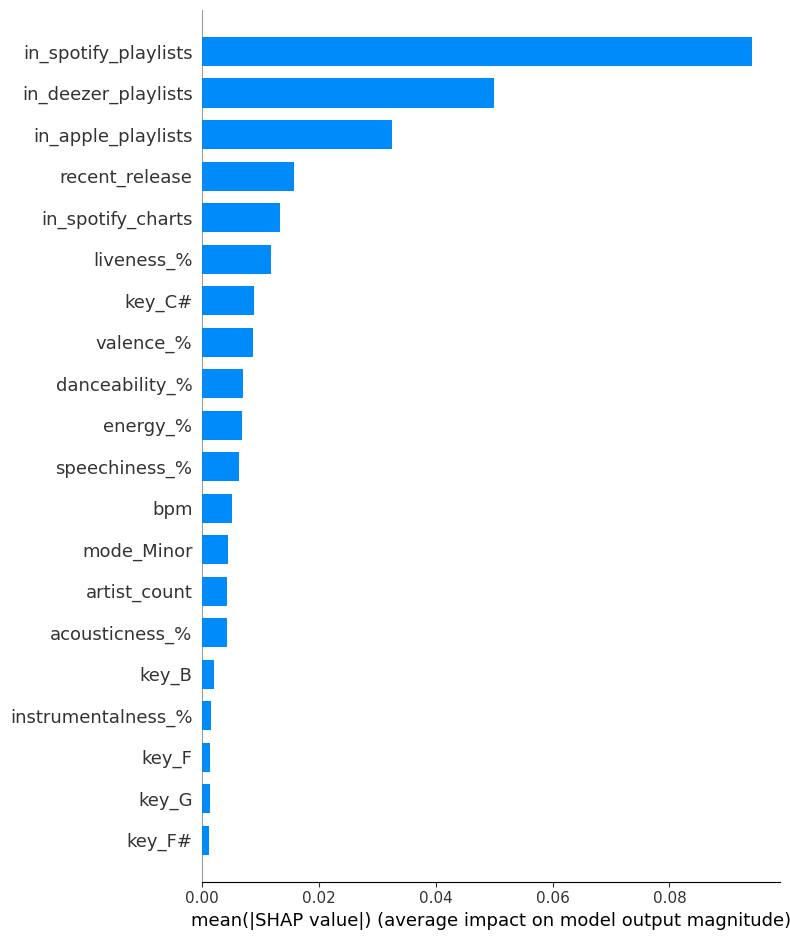

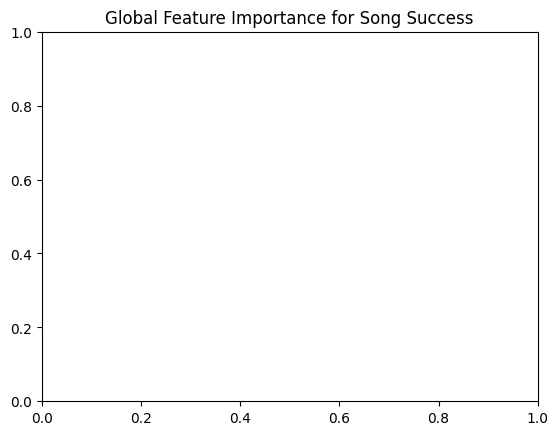

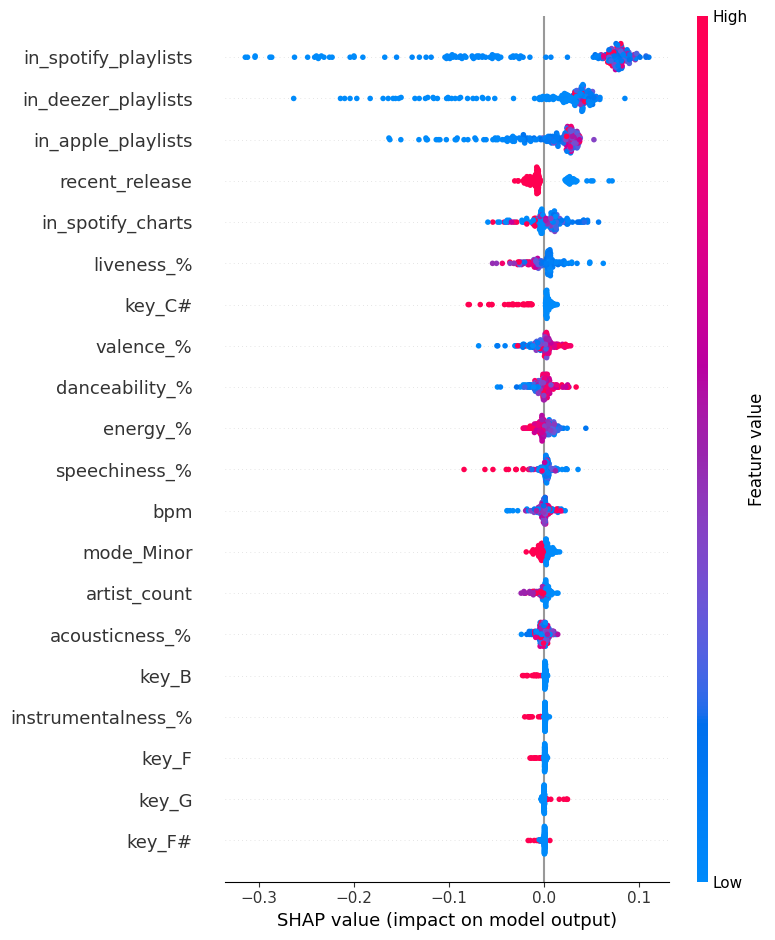

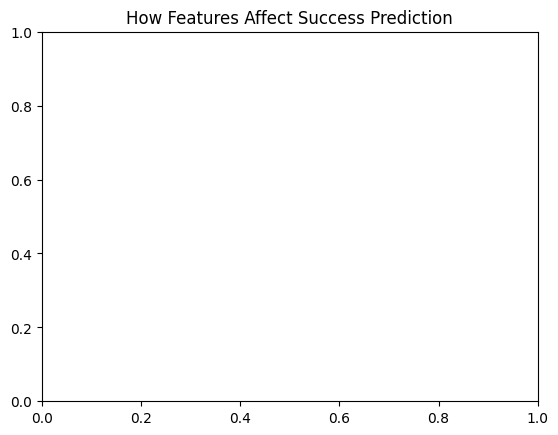


Explanation for: Seï¿½ï¿½o by Shawn Mendes, Camila Cabello
Actual Success: 1
Predicted Probability: 100.00%

Top Contributing Factors:
             feature value     shap
in_spotify_playlists 15010 0.062421
 in_deezer_playlists  1785 0.032162
  in_apple_playlists   453 0.025947
      recent_release     0 0.021753
   in_spotify_charts     2 0.006899


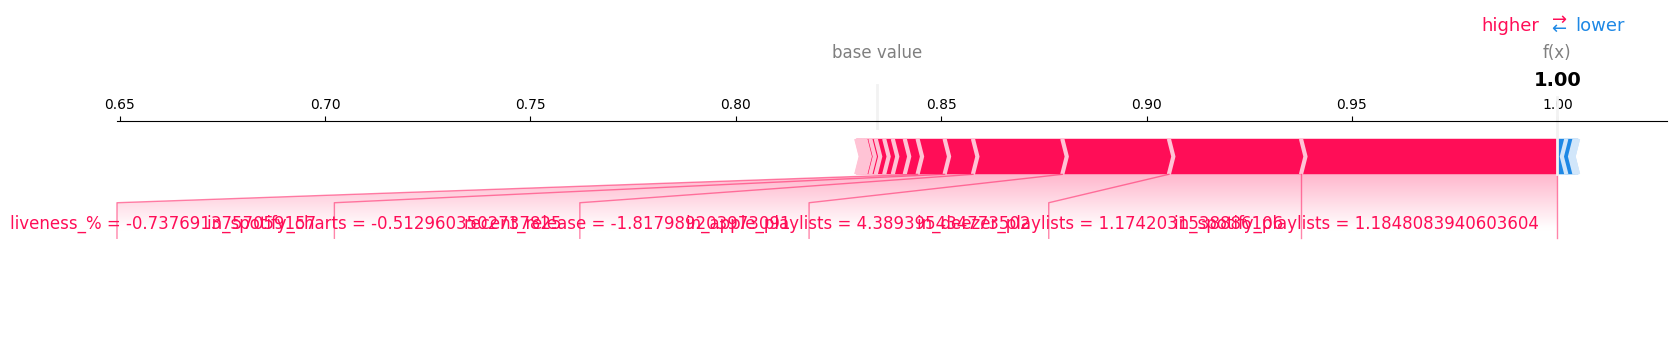

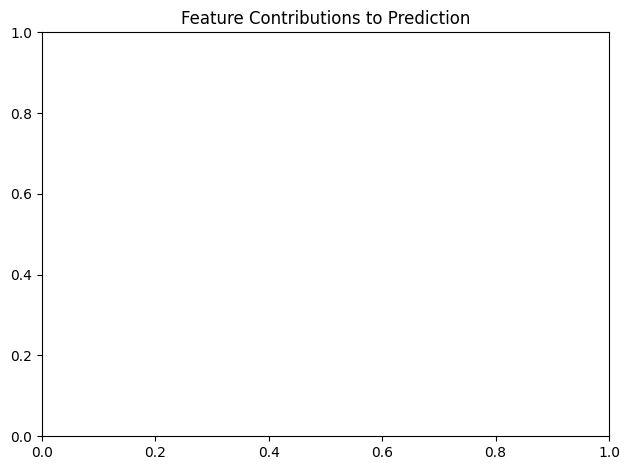


Explanation for: Lucid Dreams by Juice WRLD
Actual Success: 1
Predicted Probability: 100.00%

Top Contributing Factors:
             feature value      shap
in_spotify_playlists 14749  0.081886
 in_deezer_playlists   710  0.041750
      recent_release     0  0.030533
  in_apple_playlists   188  0.028123
      danceability_%    44 -0.007794


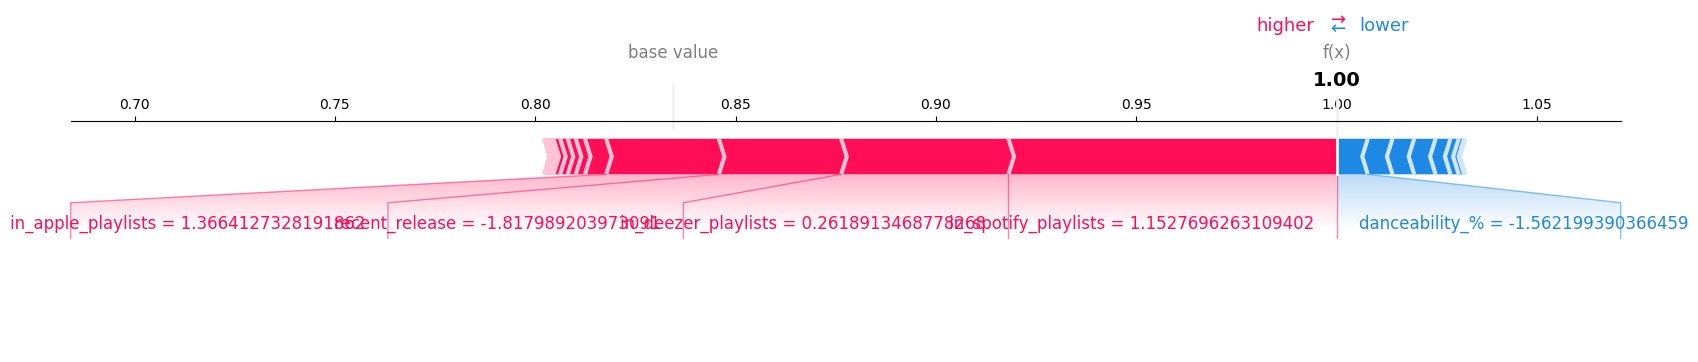

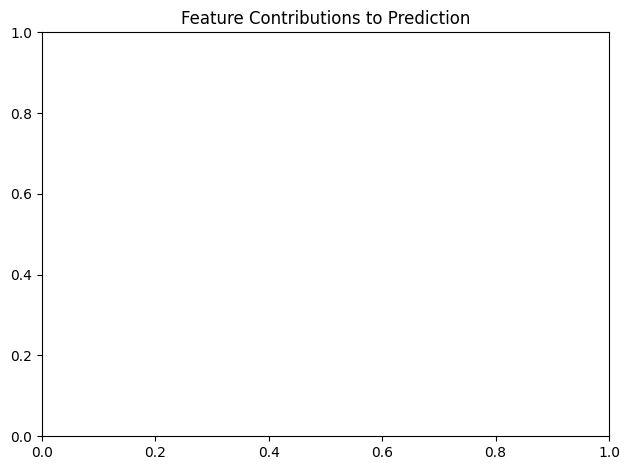


Explanation for: We Found Love by Rihanna, Calvin Harris
Actual Success: 1
Predicted Probability: 100.00%

Top Contributing Factors:
             feature value      shap
in_spotify_playlists 36843  0.076380
 in_deezer_playlists  4607  0.033637
  in_apple_playlists   321  0.028227
      recent_release     0  0.024767
              key_C#  True -0.013440


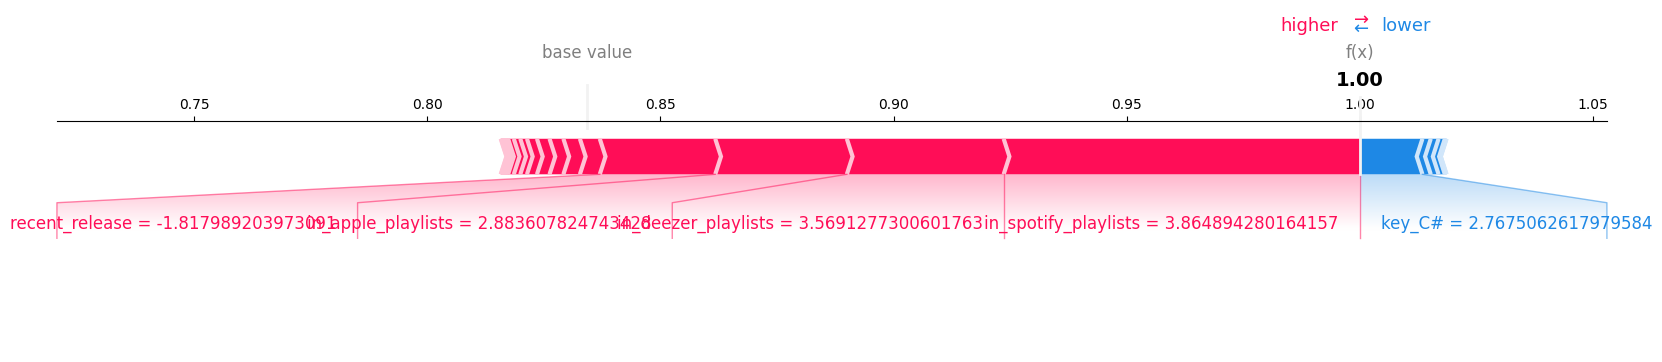

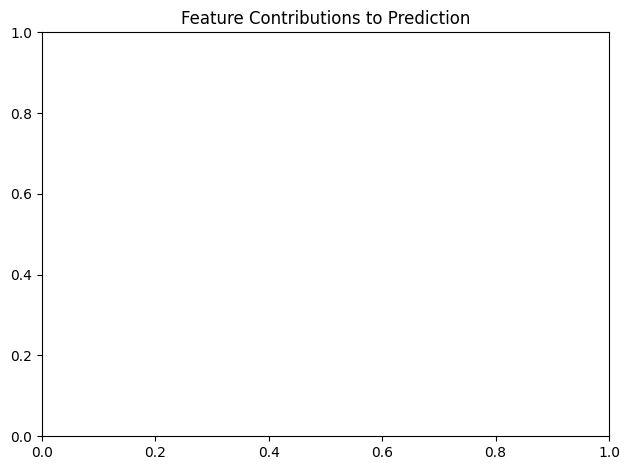


SUCCESS FORMULA:


KeyError: 'in'

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (classification_report, confusion_matrix,
                           roc_curve, roc_auc_score, accuracy_score)
import shap

# Load and clean data
df = pd.read_csv('/content/spotify-2023.csv', encoding='ISO-8859-1')

# Function to clean numeric values
def clean_numeric(series):
    return pd.to_numeric(series.astype(str).str.replace(',', ''), errors='coerce')

# Identify and clean all numeric columns
numeric_cols = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%',
                'instrumentalness_%', 'liveness_%', 'speechiness_%', 'bpm',
                'in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists',
                'in_spotify_charts', 'streams']

for col in numeric_cols:
    if col in df.columns:
        df[col] = clean_numeric(df[col])

# Define success
df['success'] = np.where(df['streams'] > 100000000, 1, 0)

# Feature engineering
df['artist_count'] = df['artist(s)_name'].apply(lambda x: len(str(x).split(',')))
df['is_explicit'] = df['track_name'].str.contains('explicit', case=False).astype(int)
df['recent_release'] = np.where(df['released_year'] >= 2020, 1, 0)

# Final feature selection
features = [
    # Audio features
    'danceability_%', 'valence_%', 'energy_%', 'acousticness_%',
    'instrumentalness_%', 'liveness_%', 'speechiness_%', 'bpm',

    # Popularity metrics
    'in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists',
    'in_spotify_charts',

    # Track characteristics
    'artist_count', 'is_explicit', 'recent_release',

    # Musical attributes
    'key', 'mode'
]

# Prepare feature matrix
X = df[features].copy()

# Convert categorical features
X = pd.get_dummies(X, columns=['key', 'mode'], drop_first=True)

# Handle any remaining non-numeric data
for col in X.columns:
    if X[col].dtype == object:
        X[col] = clean_numeric(X[col])

# Fill missing values with median
X = X.fillna(X.median())

# Target variable
y = df['success']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model training
model = RandomForestClassifier(random_state=42, n_estimators=200, max_depth=10)
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

# Model evaluation
print(f"Model Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=['Fail', 'Success'],
            yticklabels=['Fail', 'Success'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_proba):.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# SHAP Analysis
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test_scaled)

# Handle SHAP values based on their structure
if isinstance(shap_values, list):
    shap_values_2d = shap_values[1]  # For binary classification
else:
    shap_values_2d = shap_values[:,:,1] if shap_values.ndim == 3 else shap_values

# Global Feature Importance
plt.figure(figsize=(12,6))
shap.summary_plot(shap_values_2d, X_test_scaled, feature_names=X.columns, plot_type="bar")
plt.title("Global Feature Importance for Song Success")
plt.show()

# Feature Direction Analysis
plt.figure(figsize=(12,6))
shap.summary_plot(shap_values_2d, X_test_scaled, feature_names=X.columns)
plt.title("How Features Affect Success Prediction")
plt.show()

# Individual Song Explanations
def explain_song(song_index):
    """Explain why a specific song was predicted as successful"""
    song_data = df.loc[X_test.index[song_index]]
    print(f"\nExplanation for: {song_data['track_name']} by {song_data['artist(s)_name']}")
    print(f"Actual Success: {y_test.iloc[song_index]}")
    print(f"Predicted Probability: {y_proba[song_index]:.2%}")

    # Get top contributing features
    contribs = pd.DataFrame({
        'feature': X.columns,
        'value': X_test.iloc[song_index],
        'shap': shap_values_2d[song_index]
    }).sort_values('shap', key=abs, ascending=False).head(5)

    print("\nTop Contributing Factors:")
    print(contribs[['feature', 'value', 'shap']].to_string(index=False))

    # Force plot
    shap.force_plot(explainer.expected_value[1],
                   shap_values_2d[song_index],
                   X_test_scaled[song_index],
                   feature_names=X.columns,
                   matplotlib=True)
    plt.title("Feature Contributions to Prediction")
    plt.tight_layout()
    plt.show()

# Explain top 3 predicted successful songs
top_3_indices = np.argsort(y_proba)[-3:][::-1]
for idx in top_3_indices:
    explain_song(idx)

# Success Formula
shap_df = pd.DataFrame(shap_values_2d, columns=X.columns)
avg_shap = shap_df.abs().mean().sort_values(ascending=False)
top_5_factors = avg_shap.index[:5]

print("\nSUCCESS FORMULA:")
for i, feat in enumerate(top_5_factors, 1):
    success_values = df.loc[y==1, feat.split('_')[0] if '_' in feat else feat]
    if len(success_values) > 0:
        q25, q75 = np.percentile(success_values, [25,75])
        direction = "Higher" if shap_df[feat].mean() > 0 else "Lower"
        unit = '%' if '_%' in feat else ''
        print(f"{i}. {direction} {feat.replace('_%','').replace('_',' ')} ({q25:.0f}-{q75:.0f}{unit})")

# Feature Thresholds for Success
success_songs = df[df['success']==1]
print("\nOPTIMAL FEATURE RANGES FOR SUCCESS:")
for feat in top_5_factors:
    if feat in success_songs.columns:
        q25, q75 = np.percentile(success_songs[feat], [25,75])
        print(f"{feat.replace('_%','').replace('_',' ')}: {q25:.0f}-{q75:.0f}{'%' if '_%' in feat else ''}")

# Additional Insights
print("\nADDITIONAL INSIGHTS:")
if 'in_spotify_playlists' in X.columns:
    effect = shap_df['in_spotify_playlists'].mean()
    print(f"- Spotify Playlists: {'Positive' if effect > 0 else 'Negative'} impact (SHAP: {effect:.3f})")

if 'artist_count' in X.columns:
    effect = shap_df['artist_count'].mean()
    print(f"- Collaborations: {'More artists help' if effect > 0 else 'Solo works better'} (SHAP: {effect:.3f})")

if 'is_explicit' in X.columns:
    effect = shap_df['is_explicit'].mean()
    print(f"- Explicit Content: {'Helps' if effect > 0 else 'Hinders'} success (SHAP: {effect:.3f})")

if 'recent_release' in X.columns:
    effect = shap_df['recent_release'].mean()
    print(f"- Release Year: {'Newer' if effect > 0 else 'Older'} songs perform better (SHAP: {effect:.3f})")